In [1]:
import astropy

In [2]:
import spectutils as spu

ModuleNotFoundError: No module named 'spectutils'

In [3]:
pip install spectutils

ERROR: Could not find a version that satisfies the requirement spectutils (from versions: none)
ERROR: No matching distribution found for spectutils
Note: you may need to restart the kernel to use updated packages.


In [6]:
import specutils as sp

In [7]:
sp.Spectrum1D?

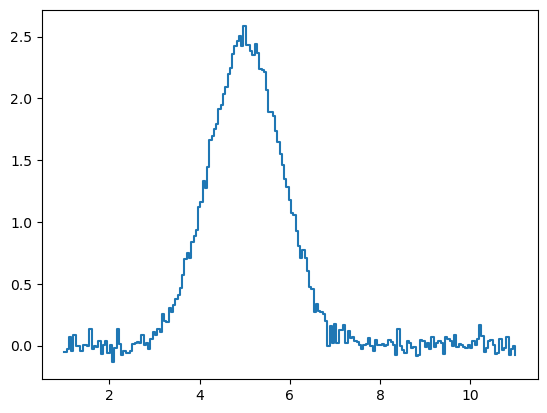

In [9]:
import numpy as np
from astropy import units as u
from astropy.nddata import StdDevUncertainty
from astropy.modeling import models
from specutils import Spectrum1D, SpectralRegion
np.random.seed(50)
spectral_axis = np.linspace(11., 1., 200) * u.GHz
spectral_model = models.Gaussian1D(amplitude=5*(2*np.pi*0.8**2)**-0.5*u.Jy, mean=5*u.GHz, stddev=0.8*u.GHz)
flux = spectral_model(spectral_axis)
flux += np.random.normal(0., 0.05, spectral_axis.shape) * u.Jy
uncertainty = StdDevUncertainty(0.2*np.ones(flux.shape)*u.Jy)
noisy_gaussian = Spectrum1D(spectral_axis=spectral_axis, flux=flux, uncertainty=uncertainty)
import matplotlib.pyplot as plt 
plt.step(noisy_gaussian.spectral_axis, noisy_gaussian.flux)

In [10]:
from astropy.utils.data import download_file
from specutils.io.registers import identify_spectrum_format

url = 'https://dr15.sdss.org/sas/dr15/manga/spectro/redux/v2_4_3/8485/stack/manga-8485-1901-LOGCUBE.fits.gz'
dd = download_file(url)  
identify_spectrum_format(dd)  
'MaNGA cube'

'MaNGA cube'

In [11]:
sp.Spectrum1D?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.modeling import models
from astropy import units as u

from specutils.spectra import Spectrum1D
from specutils.fitting import fit_lines

# Create a simple spectrum with a Gaussian.
np.random.seed(42)

g1 = models.Gaussian1D(1, 4.6, 0.2)
g2 = models.Gaussian1D(2.5, 5.5, 0.1)
x = np.linspace(0, 10, 200)
y = g1(x) + g2(x) + np.random.normal(0., 0.2, x.shape)

# Create the spectrum to fit
spectrum = Spectrum1D(flux=y*u.Jy, spectral_axis=x*u.um)

# Fit the spectrum
g1_init = models.Gaussian1D(amplitude=2.3*u.Jy, mean=5.6*u.um, stddev=0.1*u.um)
g2_init = models.Gaussian1D(amplitude=1.*u.Jy, mean=4.4*u.um, stddev=0.1*u.um)
g12_fit = fit_lines(spectrum, g1_init+g2_init)
y_fit = g12_fit(x*u.um)

plt.plot(x, y)
plt.plot(x, y_fit)
plt.title('Double Peak Fit')
plt.grid(True)

In [12]:
from pyraf import iraf

ModuleNotFoundError: No module named 'pyraf'

In [13]:
pip install pyraf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.0/602.0 kB 704.3 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyraf: filename=pyraf-2.2.1-cp311-cp311-macosx_11_0_arm64.whl size=546546 sha256=83325694785454c7f228ca6f35f7a84f177925d550dd7c37febaad2a2ce3cd84
  Stored in directory: /Users/nurullah/Library/Caches/pip/wheels/11/27/a2/a87f483964e5b203891b8820c0eba1eace06a1b413c9025521
Successfully built pyraf
Note: you may need to restart the kernel to use updated packages.


In [22]:
##### HDUL OKUMA ######



import numpy as np
from astropy.io import fits

# Specify the path to your FITS file
fits_file_path = '/Users/nurullah/Desktop/true_PNe/alfa_neat_out/neat_out/fits/png019.fits_lines.fits'
# Open the FITS file
with fits.open(fits_file_path) as hdul:
    # Access the data in the FITS file
    primary_hdu = hdul[0]
    data = primary_hdu.data
    
with fits.open(fits_file_path) as hdul:
    hdul.info()

    # Print the transposed data
    print("")
    print(data)

Filename: /Users/nurullah/Desktop/true_PNe/alfa_neat_out/neat_out/fits/png019.fits_lines.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  LINES         1 BinTableHDU     51   94R x 18C   [1E, 1E, 1E, 1E, 1E, 1E, 16A, 16A, 16A, 16A, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E]   
  2  RESULTS       1 BinTableHDU     22   166R x 4C   [40A, 1E, 1E, 1E]   
  3  QC            1 BinTableHDU     13   1R x 2C   [1L, 1L]   

None
